In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.io import ImageCollection

In [2]:
pwd

'/Users/colettace/projects/general/fluoro_gene_expr/analysis'

# Convert videos to image collections

## Grab all the videos

In [3]:
!find . -name "*.avi"

./video_data/20170717 HyperRED 4T1exo H2O2/HyperRED H2O2 500uM Laser11 1042gain -8DigO 5speed 10sInter 10mins.avi
./video_data/20170717 HyperRED 4T1exo H2O2/HyperRED H2O2 500uM Laser11 1042gain -8DigO 5speed 10sInter 10mins_singlechannel.avi
./video_data/20170717 HyperRED 4T1exo H2O2/HyperRED w 4T1EXO H2O2 500uM Laser11 1042gain -8DigO 5speed 10sInter 10mins.avi
./video_data/20170717 HyperRED 4T1exo H2O2/HyperRED w 4T1EXO H2O2 500uM Laser11 1042gain -8DigO 5speed 10sInter 10mins_singlechannel.avi
./video_data/20170816 HyperRED 4T1exo H2O2/HyperRED 4T1exosomes H2O2 500uM plate1.avi
./video_data/20170816 HyperRED 4T1exo H2O2/HyperRED 4T1exosomes H2O2 500uM plate1_singlechannel.avi
./video_data/20170816 HyperRED 4T1exo H2O2/HyperRED 4T1exosomes H2O2 500uM plate2.avi
./video_data/20170816 HyperRED 4T1exo H2O2/HyperRED 4T1exosomes H2O2 500uM plate2_singlechannel.avi
./video_data/20170816 HyperRED 4T1exo H2O2/HyperRED 4T1exosomes H2O2 500uM plate3.avi
./video_data/20170816 HyperRED 4T1exo H2

In [4]:
import os

In [5]:
input_dir = 'video_data'
output_dir = 'image_data'

In [6]:
input_videos = []
output_name_prefixes = []
for tl_root, tl_dirs, tl_files in os.walk( input_dir ):
    for tl_dir in tl_dirs:
        for root, _dir, files in os.walk( os.path.join( input_dir, tl_dir ) ):
            for f in files:
                if f.endswith( '.avi' ):
                    video_path = os.path.join( input_dir, tl_dir, f )
                    input_videos.append( video_path )
                    # Grab the date from the directory
                    date = tl_dir.split()[0]
                    # remove spaces from filename
                    new_f = f.replace( ' ', '_' )
                    # remove the .avi form the pathname: slice off the last 4 characters
                    new_f = new_f[:-4]
                    new_name_path = os.path.join( output_dir, date + '_' + new_f )
                    output_name_prefixes.append(new_name_path)

In [7]:
from subprocess import run

In [8]:
for i, o in zip( input_videos, output_name_prefixes ):
    command = ['ffmpeg', '-i', i, '-f', 'image2', o + "%05d.png"]
    print( " ".join( command ), '\n' )
    run( command, check=True )

ffmpeg -i video_data/20170717 HyperRED 4T1exo H2O2/HyperRED H2O2 500uM Laser11 1042gain -8DigO 5speed 10sInter 10mins.avi -f image2 image_data/20170717_HyperRED_H2O2_500uM_Laser11_1042gain_-8DigO_5speed_10sInter_10mins%05d.png 

ffmpeg -i video_data/20170717 HyperRED 4T1exo H2O2/HyperRED H2O2 500uM Laser11 1042gain -8DigO 5speed 10sInter 10mins_singlechannel.avi -f image2 image_data/20170717_HyperRED_H2O2_500uM_Laser11_1042gain_-8DigO_5speed_10sInter_10mins_singlechannel%05d.png 

ffmpeg -i video_data/20170717 HyperRED 4T1exo H2O2/HyperRED w 4T1EXO H2O2 500uM Laser11 1042gain -8DigO 5speed 10sInter 10mins.avi -f image2 image_data/20170717_HyperRED_w_4T1EXO_H2O2_500uM_Laser11_1042gain_-8DigO_5speed_10sInter_10mins%05d.png 

ffmpeg -i video_data/20170717 HyperRED 4T1exo H2O2/HyperRED w 4T1EXO H2O2 500uM Laser11 1042gain -8DigO 5speed 10sInter 10mins_singlechannel.avi -f image2 image_data/20170717_HyperRED_w_4T1EXO_H2O2_500uM_Laser11_1042gain_-8DigO_5speed_10sInter_10mins_singlechannel%05

In [9]:
single_channels = [ _ for _ in output_name_prefixes if 'singlechannel' in _ ]
three_channels = [ _ for _ in output_name_prefixes if 'singlechannel' not in _ ]

In [10]:
three_channels

['image_data/20170717_HyperRED_H2O2_500uM_Laser11_1042gain_-8DigO_5speed_10sInter_10mins',
 'image_data/20170717_HyperRED_w_4T1EXO_H2O2_500uM_Laser11_1042gain_-8DigO_5speed_10sInter_10mins',
 'image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate1',
 'image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate2',
 'image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate3',
 'image_data/20170816_HyperRED_H2O2_500uM_plate1',
 'image_data/20170816_HyperRED_H2O2_500uM_plate2',
 'image_data/20170816_HyperRED_H2O2_500uM_plate3',
 'image_data/20170816_WT_RAW_H2O2_500uM']

# Load videos and get summary stats

Remove the 7-pixel border on the left side of all videos

In [11]:
rgb_videos = {}
for frame_prefix in three_channels:
    frames = ImageCollection( frame_prefix + '*.png' )
    rgb_videos[ frame_prefix ] = [ f[:,7:,:] for f in frames ]
    print( frame_prefix, len(frames) )

image_data/20170717_HyperRED_H2O2_500uM_Laser11_1042gain_-8DigO_5speed_10sInter_10mins 120
image_data/20170717_HyperRED_w_4T1EXO_H2O2_500uM_Laser11_1042gain_-8DigO_5speed_10sInter_10mins 120
image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate1 120
image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate2 120
image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate3 120
image_data/20170816_HyperRED_H2O2_500uM_plate1 120
image_data/20170816_HyperRED_H2O2_500uM_plate2 120
image_data/20170816_HyperRED_H2O2_500uM_plate3 120
image_data/20170816_WT_RAW_H2O2_500uM 120


# Red channel average pixel intensity across videos

image_data/20170717_HyperRED_H2O2_500uM_Laser11_1042gain_-8DigO_5speed_10sInter_10mins
image_data/20170717_HyperRED_w_4T1EXO_H2O2_500uM_Laser11_1042gain_-8DigO_5speed_10sInter_10mins
image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate1
image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate2
image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate3
image_data/20170816_HyperRED_H2O2_500uM_plate1
image_data/20170816_HyperRED_H2O2_500uM_plate2
image_data/20170816_HyperRED_H2O2_500uM_plate3
image_data/20170816_WT_RAW_H2O2_500uM


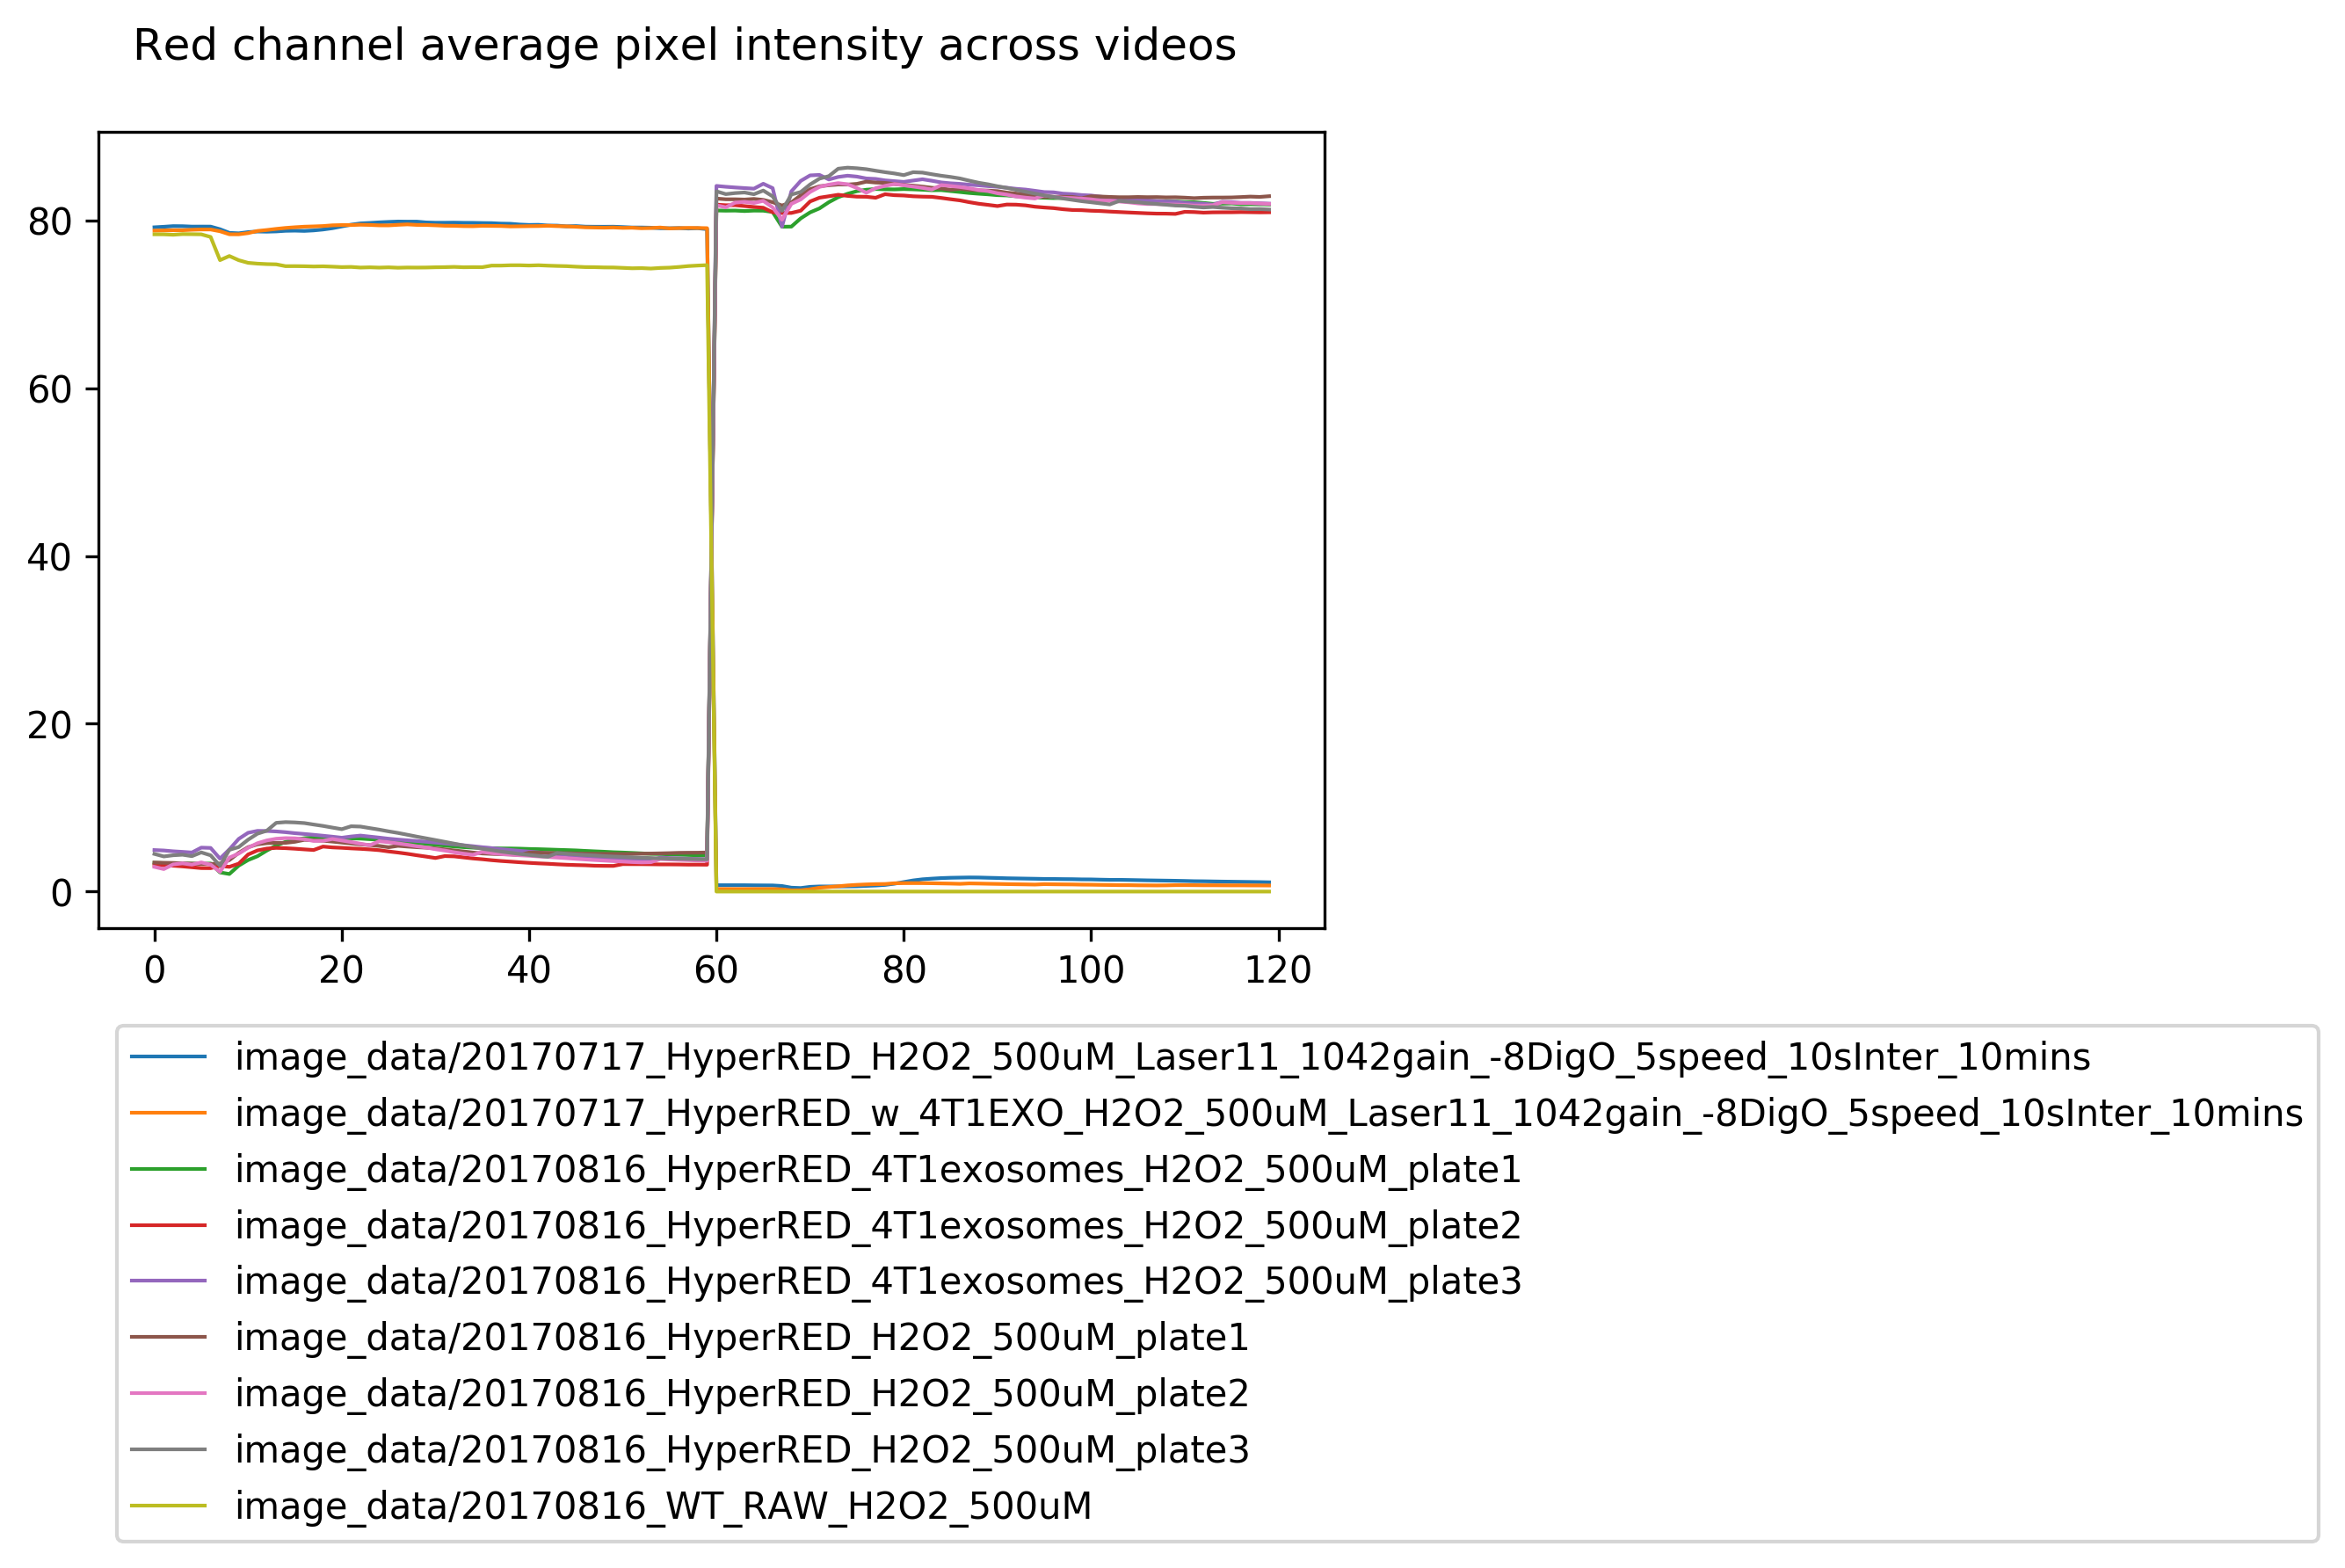

In [12]:
fig, ax = plt.subplots( figsize=(6,4), dpi=(300))
for frame_prefix, frames in rgb_videos.items():
    print( frame_prefix )
    ax.plot( [ f[:,:,0].mean() for f in frames ], label=frame_prefix, linewidth=1 )
ax.legend( loc='upper left', bbox_to_anchor=(0, -0.1) )
fig.suptitle( 'Red channel average pixel intensity across videos ')
fig.savefig( '20170911_RedChannelMeanPixelIntensity.pdf')

# Green Channel Average Pixel Intensity

image_data/20170717_HyperRED_H2O2_500uM_Laser11_1042gain_-8DigO_5speed_10sInter_10mins
image_data/20170717_HyperRED_w_4T1EXO_H2O2_500uM_Laser11_1042gain_-8DigO_5speed_10sInter_10mins
image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate1
image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate2
image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate3
image_data/20170816_HyperRED_H2O2_500uM_plate1
image_data/20170816_HyperRED_H2O2_500uM_plate2
image_data/20170816_HyperRED_H2O2_500uM_plate3
image_data/20170816_WT_RAW_H2O2_500uM


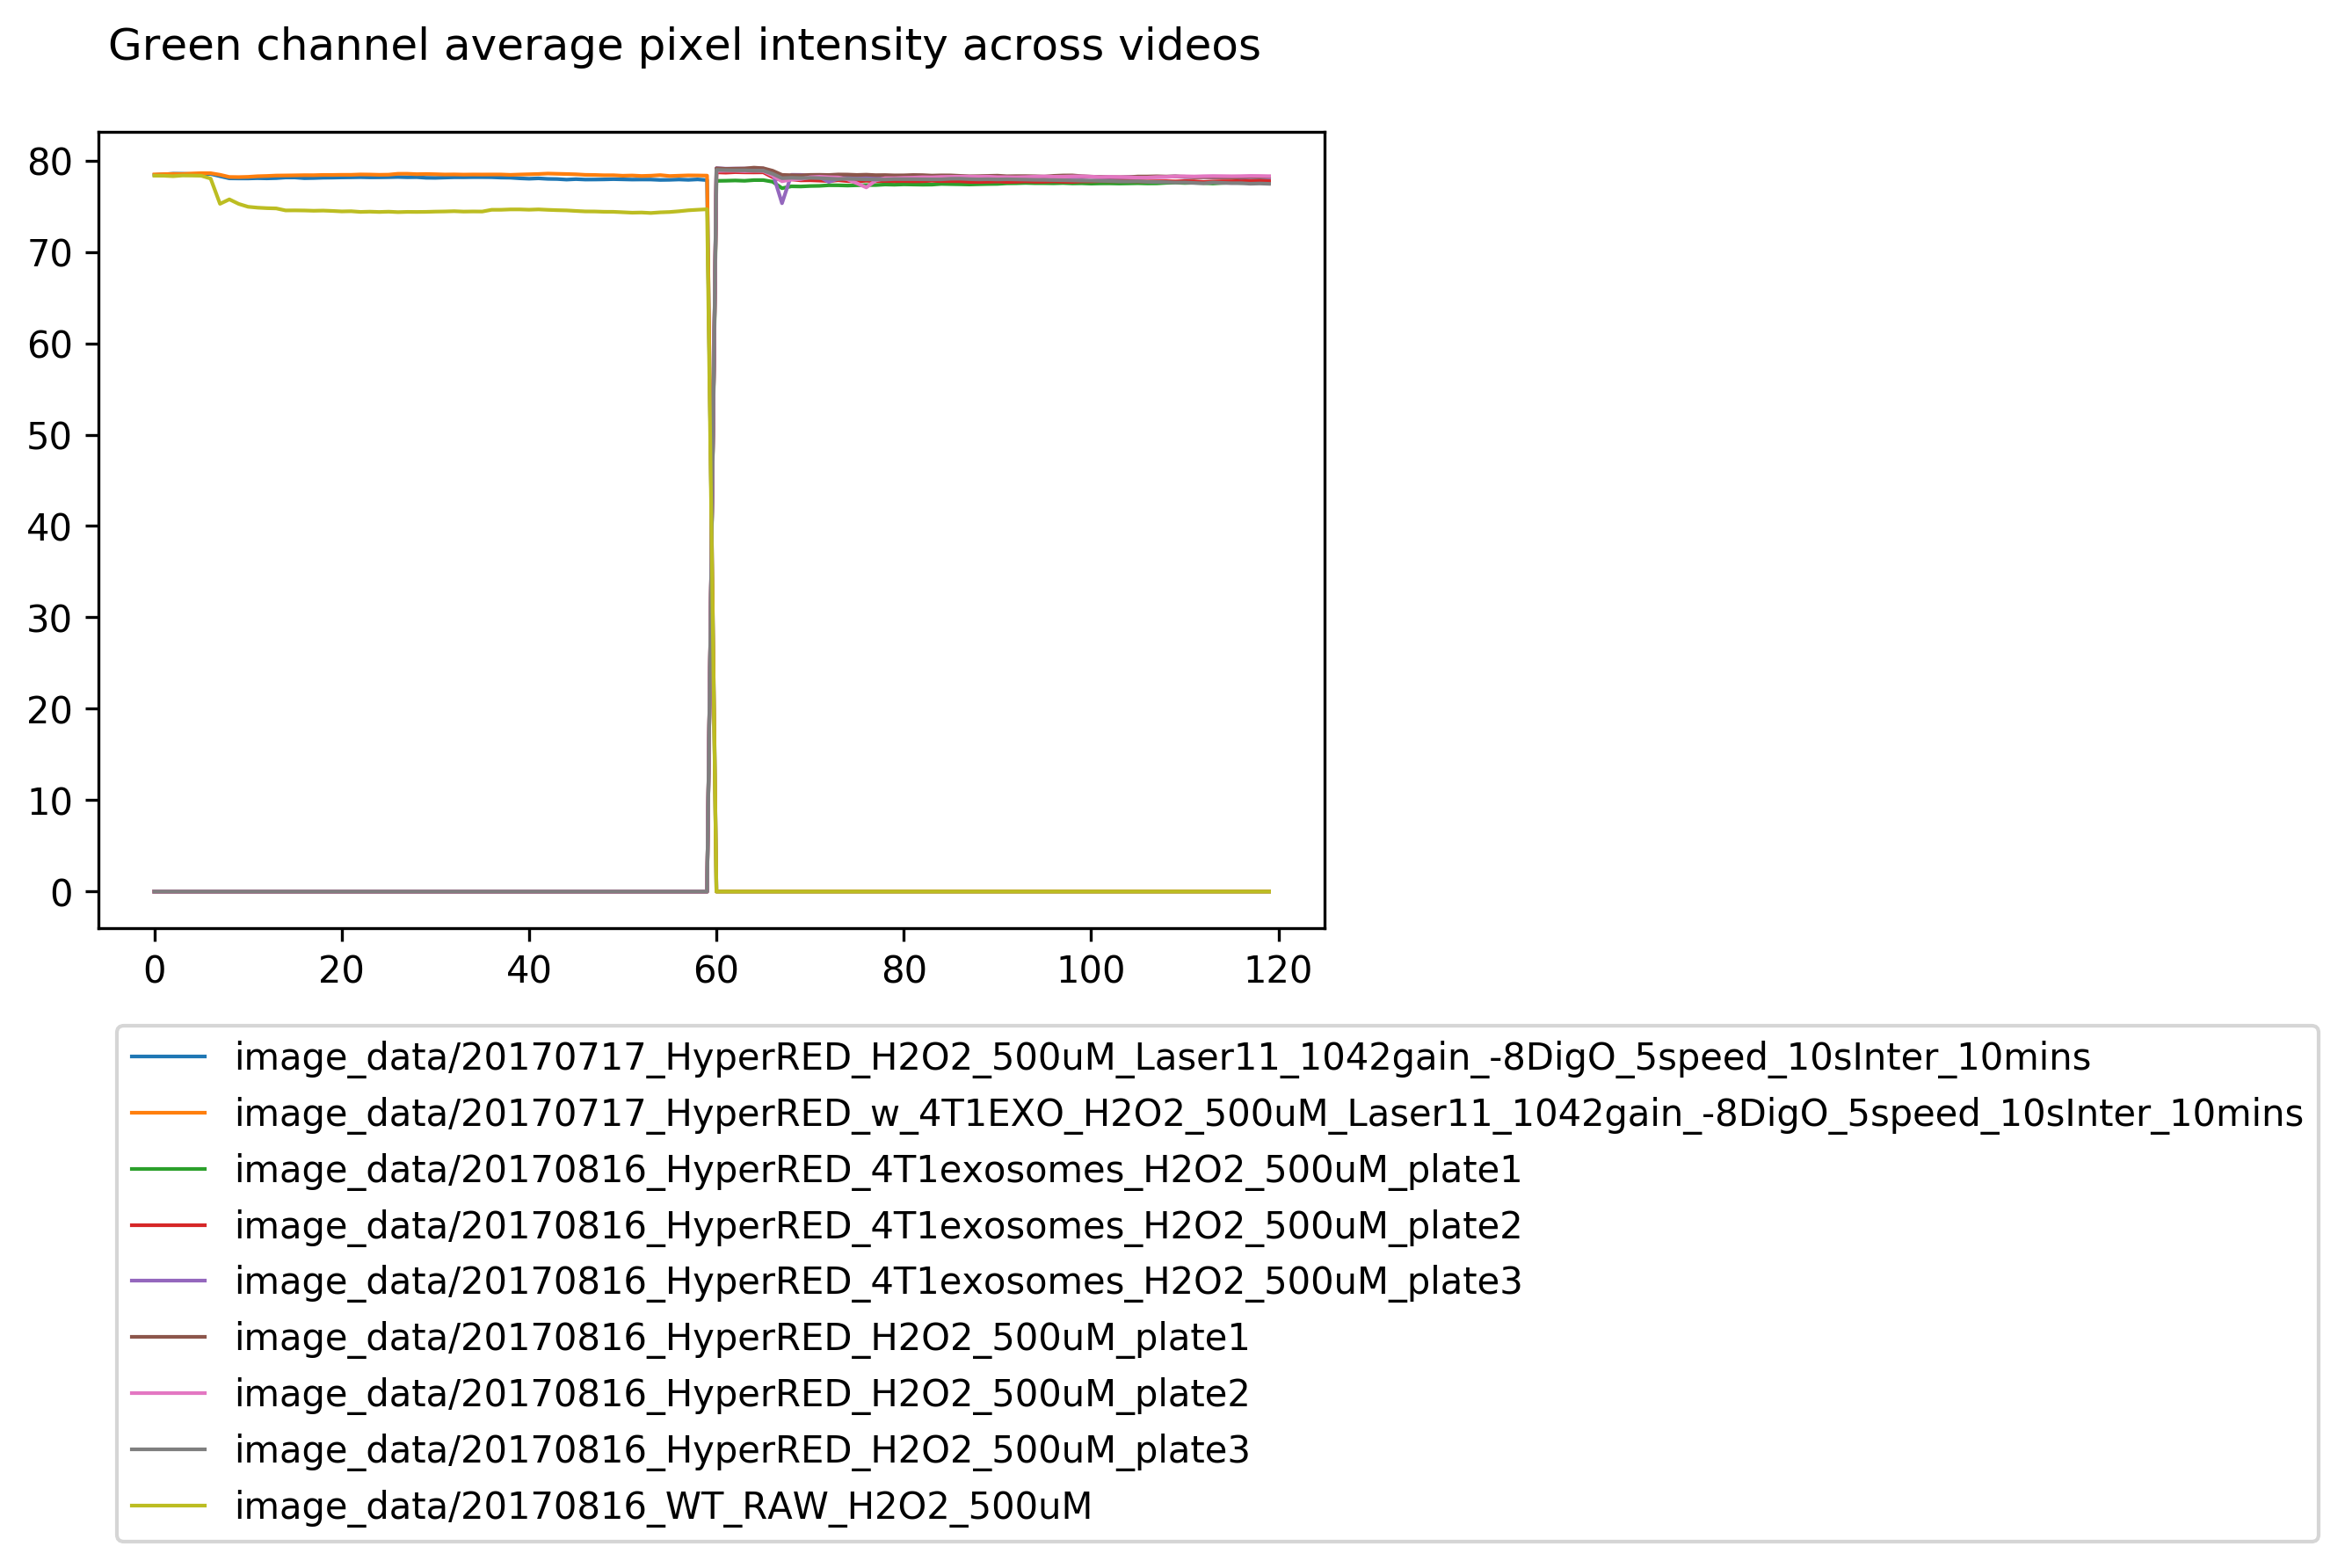

In [13]:
fig, ax = plt.subplots( figsize=(6,4), dpi=(300))
for frame_prefix, frames in rgb_videos.items():
    print( frame_prefix )
    ax.plot( [ f[:,:,1].mean() for f in frames ], label=frame_prefix, linewidth=1 )
ax.legend( loc='upper left', bbox_to_anchor=(0, -0.1) )
fig.suptitle( 'Green channel average pixel intensity across videos ')
fig.savefig( '20170911_GreenChannelMeanPixelIntensity.pdf')

# Blue Channel Average Pixel intensity

image_data/20170717_HyperRED_H2O2_500uM_Laser11_1042gain_-8DigO_5speed_10sInter_10mins
image_data/20170717_HyperRED_w_4T1EXO_H2O2_500uM_Laser11_1042gain_-8DigO_5speed_10sInter_10mins
image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate1
image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate2
image_data/20170816_HyperRED_4T1exosomes_H2O2_500uM_plate3
image_data/20170816_HyperRED_H2O2_500uM_plate1
image_data/20170816_HyperRED_H2O2_500uM_plate2
image_data/20170816_HyperRED_H2O2_500uM_plate3
image_data/20170816_WT_RAW_H2O2_500uM


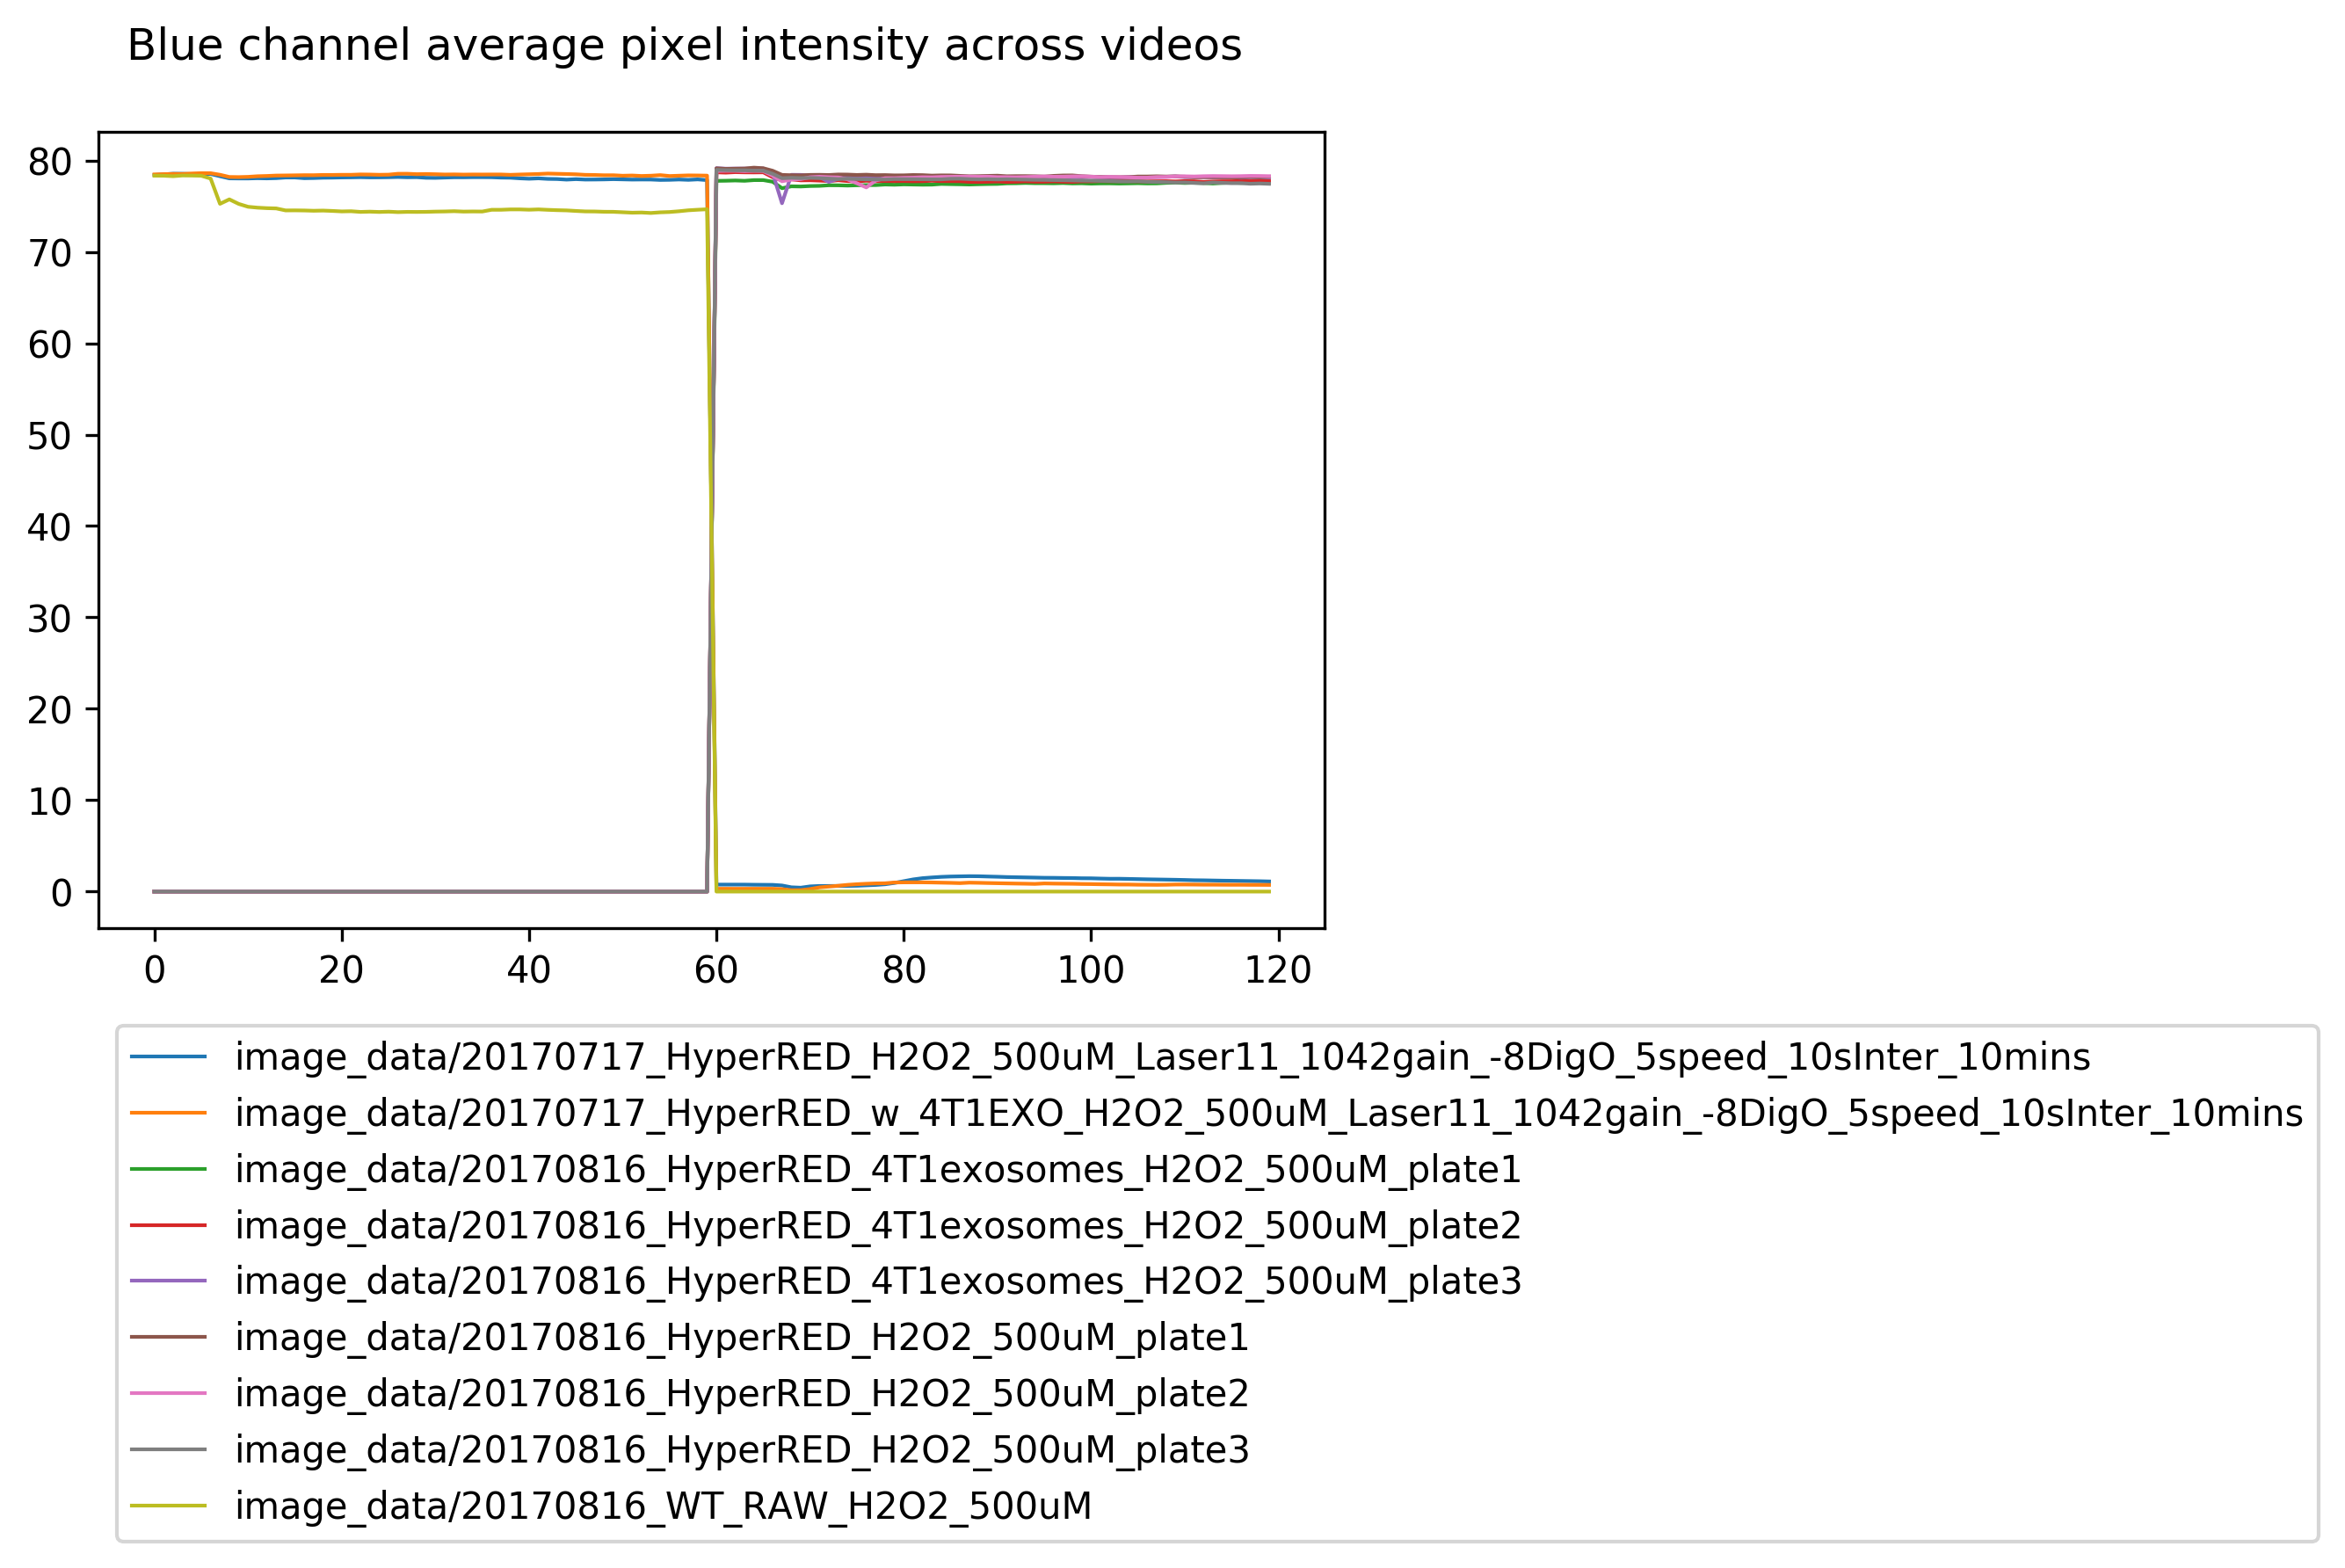

In [14]:
fig, ax = plt.subplots( figsize=(6,4), dpi=(300))
for frame_prefix, frames in rgb_videos.items():
    print( frame_prefix )
    ax.plot( [ f[:,:,2].mean() for f in frames ], label=frame_prefix, linewidth=1 )
ax.legend( loc='upper left', bbox_to_anchor=(0, -0.1) )
fig.suptitle( 'Blue channel average pixel intensity across videos ')
fig.savefig( '20170911_BlueChannelMeanPixelIntensity.pdf')

# Print out the average Red pixel intensity per frame per video

In [15]:
for frame_prefix, frames in rgb_videos.items():
    print( frame_prefix )
    for t, f in enumerate( frames ):
        print( t, f[:,:,0].mean() )

image_data/20170717_HyperRED_H2O2_500uM_Laser11_1042gain_-8DigO_5speed_10sInter_10mins
0 79.1779212952
1 79.2402915955
2 79.3166656494
3 79.3082809448
4 79.2603225708
5 79.2636642456
6 79.2598266602
7 78.9456100464
8 78.5124664307
9 78.4598045349
10 78.600315094
11 78.6742668152
12 78.6548042297
13 78.6852722168
14 78.7582626343
15 78.7781257629
16 78.7461509705
17 78.806350708
18 78.91381073
19 79.0686187744
20 79.2825737
21 79.4869651794
22 79.6401443481
23 79.6964187622
24 79.7658042908
25 79.8180580139
26 79.8623313904
27 79.8507728577
28 79.8529167175
29 79.7552337646
30 79.7211837769
31 79.7204055786
32 79.7320404053
33 79.7108345032
34 79.7060585022
35 79.6842918396
36 79.6713752747
37 79.616065979
38 79.5957717896
39 79.5045700073
40 79.456325531
41 79.470451355
42 79.3879776001
43 79.373085022
44 79.2921142578
45 79.3218841553
46 79.2545623779
47 79.2431793213
48 79.239780426
49 79.2480697632
50 79.2031669617
51 79.1526222229
52 79.150592804
53 79.1285018921
54 79.0642166138
5

114 82.1660003662
115 82.1036758423
116 82.0715141296
117 82.0645980835
118 82.0101013184
119 81.9569320679
image_data/20170816_HyperRED_H2O2_500uM_plate3
0 4.49053955078
1 4.18975067139
2 4.33127975464
3 4.39588928223
4 4.22465896606
5 4.67122268677
6 4.32232284546
7 3.08242034912
8 4.97606658936
9 5.3084526062
10 6.18630218506
11 6.90194702148
12 7.25658798218
13 8.1954574585
14 8.28034210205
15 8.24343490601
16 8.16641998291
17 7.9933013916
18 7.82669067383
19 7.62939453125
20 7.43814849854
21 7.78779220581
22 7.75060653687
23 7.56423950195
24 7.38535690308
25 7.17865753174
26 6.99142456055
27 6.77611541748
28 6.55495071411
29 6.34973907471
30 6.14217376709
31 5.9291305542
32 5.71683502197
33 5.504322052
34 5.30571365356
35 5.10501861572
36 4.94611358643
37 4.77195739746
38 4.63199615479
39 4.48643875122
40 4.36988830566
41 4.25561904907
42 4.15135574341
43 4.60507202148
44 4.5129776001
45 4.43228149414
46 4.362159729
47 4.30773162842
48 4.23128509521
49 4.18071746826
50 4.137523651